<a href="https://colab.research.google.com/github/NikitaMarnykh/karnegie_mellon_university_machine_analysis/blob/main/%D0%9C%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%9D_%D0%92_%D1%83%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%9A%D0%B0%D1%80%D0%BD%D0%B5%D0%B3%D0%B8_%D0%9C%D0%B5%D0%BB%D0%BE%D0%BD_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D0%B7%D0%B0%D0%B8%D0%BC%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%B8_%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8_%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Признаки, которые будут использованы для дальнейшего анализа:

  * Количественные признаки:
  
    - mpg

    - cylinders

    - displacement

    - horsepower

    - weight

    - acceleration

    - model year

  * Категориальные признаки:

    - origin

## 11. Установка и подключение зависимостей

Устанавливаем все необходимые зависимости

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scipy
!pip install seaborn

Подключаем все необходимые зависимости

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

Подгружаем репозиторий для работы с ним

In [3]:
!git clone https://github.com/NikitaMarnykh/karnegie_mellon_university_machine_analysis

Cloning into 'karnegie_mellon_university_machine_analysis'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 51 (delta 31), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 2.55 MiB | 8.39 MiB/s, done.
Resolving deltas: 100% (31/31), done.


Перейдём в установленный репозиторий

In [4]:
%cd karnegie_mellon_university_machine_analysis/

/content/karnegie_mellon_university_machine_analysis


Сохраним датасет в переменную

In [5]:
dtypes = {
    'origin': 'category'
}

dataset = pd.read_csv('auto-mpg-cleaned.csv',
                      na_values=['NA', 'N/A', 'null', 'missing', '-', '?', '...'],
                      keep_default_na=True,
                      na_filter=True,
                      dtype=dtypes)

Посмотрим информацию о датасете

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   mpg            398 non-null    float64 
 1   cylinders      398 non-null    int64   
 2   displacement   398 non-null    float64 
 3   horsepower     398 non-null    float64 
 4   weight         398 non-null    int64   
 5   acceleration   398 non-null    float64 
 6   model year     398 non-null    int64   
 7   origin         398 non-null    category
 8   origin_Europe  398 non-null    bool    
 9   origin_Asia    398 non-null    bool    
dtypes: bool(2), category(1), float64(4), int64(3)
memory usage: 23.2 KB


## 12. Анализ взаимосвязи категориального и количественного признаков

### 12.1 Признаки mpg и origin

Нулевая гипотеза (H₀): распределения двух независимых выборок идентичны. Уровень значимости полагаем равным 0,05

Сохраним именна переменных в кортеж columns

In [7]:
columns = ('mpg', 'origin')

Оценим медианные значения данного количественного признака в разрезе данного категориального

In [8]:
dataset.groupby(columns[1], observed=False)[columns[0]].median()

,mpg
origin,
1,18.5
2,26.5
3,31.6


Оценим средние значения данного количественного признака в разрезе данного категориального

In [9]:
dataset.groupby(columns[1], observed=False)[columns[0]].mean()

,mpg
origin,
1,20.083534
2,27.891429
3,30.450633


Оценим описательные статистики данного количественного признака в разрезе данного категориального

In [10]:
dataset.groupby(columns[1], observed=False)[columns[0]].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0
2,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
3,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6


Построим диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - данный категориальный признак, а в качестве y - данный количественный признак

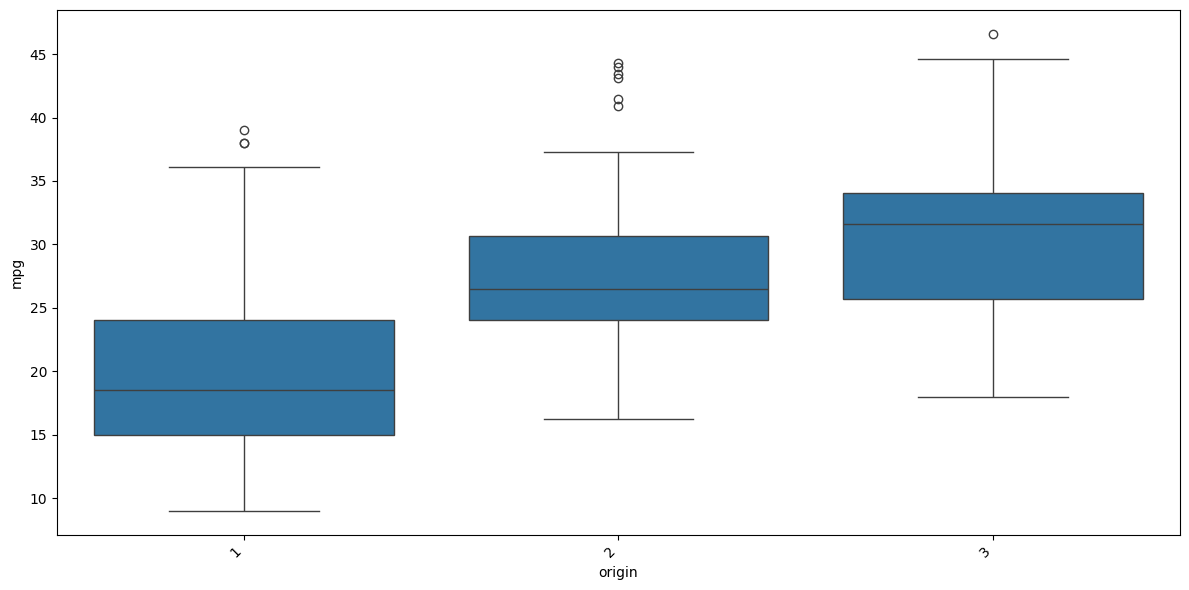

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=columns[1],
    y=columns[0],
    data=dataset[dataset[columns[1]].isin(dataset[columns[1]].unique())]
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Поскольку анализируемые выборки являются независимыми, их распределение не является нормальным, а количество сравниваемых групп превышает две, для проверки статистической значимости различий был применён непараметрический критерий Краскала-Уолиса

In [12]:
dataset.groupby(columns[1], observed=False)[columns[0]].apply(list)

,mpg
origin,
1,"[18.0, 15.0, 18.0, 16.0, 17.0, 15.0, 14.0, 14...."
2,"[26.0, 25.0, 24.0, 25.0, 26.0, 28.0, 30.0, 30...."
3,"[24.0, 27.0, 27.0, 25.0, 31.0, 35.0, 24.0, 19...."


In [13]:
stats.kruskal(*dataset.groupby(columns[1], observed=False)[columns[0]].apply(list))

KruskalResult(statistic=np.float64(134.45665866995384), pvalue=np.float64(6.354882752621894e-30))

**Выводы по анализу взаимосвязи количественного и категориального признаков:**

*   **1. Статистическая значимость различий:**
    *   Присутствует статистически значимая взаимосвязь между количественным признаком `mpg` и категориальным признаком `origin`. Тест Краскала-Уоллиса показал статистически значимые различия (p-value = 6.35e-30, p < 0.05), что позволяет отвергнуть нулевую гипотезу об отсутствии различий между группами.

*   **2. Анализ описательных статистик:**
    *   **Средние значения:**
        *   Наибольшее среднее значение наблюдается в группе **3 (30.45)**, наименьшее — в группе **1 (20.08)**.
    *   **Медианные значения:**
        *   Наибольшая медиана наблюдается в группе **3 (31.6)**, наименьшая — в группе **1 (18.5)**.
    *   **Разброс данных:**
        *   Наибольший разброс характерен для группы **2 (std = 6.72)**, наименьший — для группы **3 (std = 6.09)**.
    *   **Экстремальные значения:**
        *   Максимальное значение признака зафиксировано в группе **3 (46.6)**, минимальное — в группе **1 (9.0)**.

*   **3. Анализ ящиков с усами:**
    *   **Разброс значений:**
        *   Наибольший разброс данных (самый длинный ящик и усы) наблюдается в группе **1**, что указывает на высокую вариабельность наблюдений. Наиболее компактное распределение характерно для группы **2**.
    *   **Выбросы:**
        *   Наличие выбросов наблюдается в группах **1, 2, 3**, что может свидетельствовать о наличии уникальных случаев или особенностей данных.
    *   **Сравнение распределений:**
        *   Распределения групп перекрываются **умеренно**, что **подтверждает** наличие статистически значимых различий между ними.

*   **4. Интерпретация результатов:**
    *   Результаты анализа подтверждают, что категориальный признак `origin` оказывает существенное влияние на количественный показатель `mpg`. Наиболее высокие значения характерны для группы **3**, тогда как группа **1** демонстрирует наименьшие значения как по средним, так и по медианным показателям. Различия в размахах распределения между группами указывают на неоднородность варьирования признака в разных категориях.

### 12.2 Признаки cylinders и origin

Нулевая гипотеза (H₀): распределения двух независимых выборок идентичны. Уровень значимости полагаем равным 0,05

Сохраним именна переменных в кортеж columns

In [14]:
columns = ('cylinders', 'origin')

Оценим медианные значения данного количественного признака в разрезе данного категориального

In [15]:
dataset.groupby(columns[1], observed=False)[columns[0]].median()

,cylinders
origin,
1,6.0
2,4.0
3,4.0


Оценим средние значения данного количественного признака в разрезе данного категориального

In [16]:
dataset.groupby(columns[1], observed=False)[columns[0]].mean()

,cylinders
origin,
1,6.248996
2,4.157143
3,4.101266


Оценим описательные статистики данного количественного признака в разрезе данного категориального

In [17]:
dataset.groupby(columns[1], observed=False)[columns[0]].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,249.0,6.248996,1.661425,4.0,4.0,6.0,8.0,8.0
2,70.0,4.157143,0.500310,4.0,4.0,4.0,4.0,6.0
3,79.0,4.101266,0.590414,3.0,4.0,4.0,4.0,6.0


Построим диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - данный категориальный признак, а в качестве y - данный количественный признак

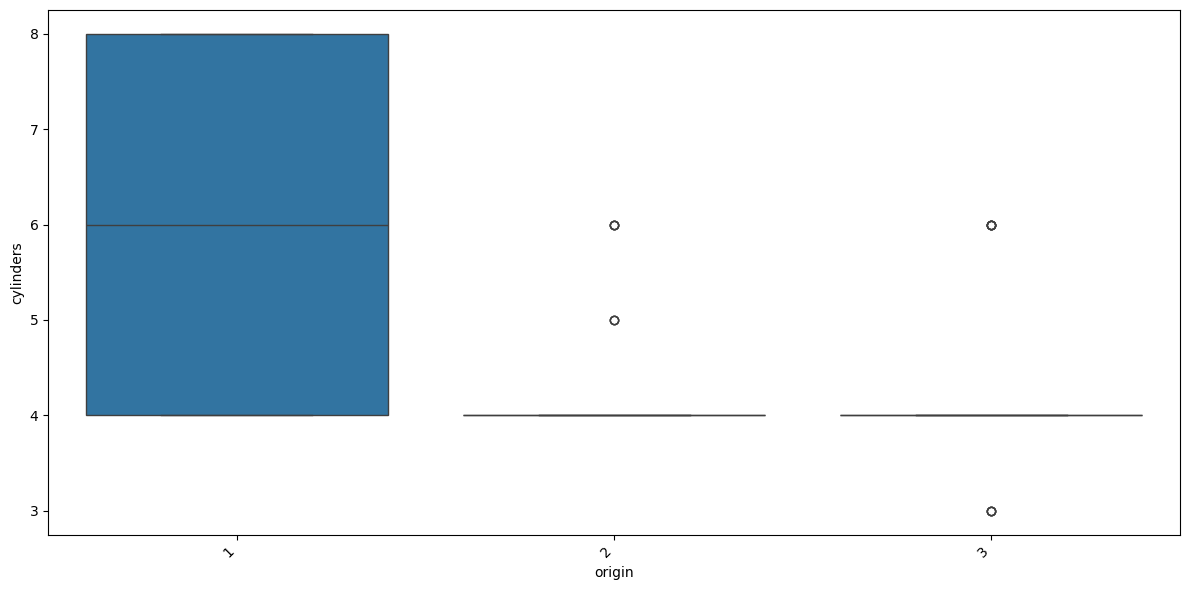

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=columns[1],
    y=columns[0],
    data=dataset[dataset[columns[1]].isin(dataset[columns[1]].unique())]
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Поскольку анализируемые выборки являются независимыми, их распределение не является нормальным, а количество сравниваемых групп превышает две, для проверки статистической значимости различий был применён непараметрический критерий Краскала-Уолиса

In [19]:
dataset.groupby(columns[1], observed=False)[columns[0]].apply(list)

,cylinders
origin,
1,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, ..."
2,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
3,"[4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 6, ..."


In [20]:
stats.kruskal(*dataset.groupby(columns[1], observed=False)[columns[0]].apply(list))

KruskalResult(statistic=np.float64(151.0166773350403), pvalue=np.float64(1.611184143132911e-33))

**Выводы по анализу взаимосвязи количественного и категориального признаков:**

*   **1. Статистическая значимость различий:**
    *   Присутствует статистически значимая взаимосвязь между количественным признаком `cylinders` и категориальным признаком `origin`. Тест Краскала-Уоллиса показал статистически значимые различия (p-value = 1.61e-33, p < 0.05), что позволяет отвергнуть нулевую гипотезу об отсутствии различий между группами.

*   **2. Анализ описательных статистик:**
    *   **Средние значения:**
        *   Наибольшее среднее значение наблюдается в группе **1 (6.25)**, наименьшее — в группе **3 (4.10)**.
    *   **Медианные значения:**
        *   Наибольшая медиана наблюдается в группе **1 (6.0)**, наименьшая — в группах **2 и 3 (4.0)**.
    *   **Разброс данных:**
        *   Наибольший разброс характерен для группы **1 (std = 1.66)**, наименьший — для группы **2 (std = 0.50)**.
    *   **Экстремальные значения:**
        *   Максимальное значение признака зафиксировано в группе **1 (8.0)**, минимальное — в группе **3 (3.0)**.

*   **3. Анализ ящиков с усами:**
    *   **Разброс значений:**
        *   Наибольший разброс данных (самый длинный ящик и усы) наблюдается в группе **1**, что указывает на высокую вариабельность наблюдений. Наиболее компактное распределение характерно для групп **2 и 3**.
    *   **Выбросы:**
        *   Наличие выбросов наблюдается в группах **2 и 3**, что может свидетельствовать о наличии уникальных случаев или особенностей данных.
    *   **Сравнение распределений:**
        *   Распределения групп перекрываются **незначительно**, что **подтверждает** наличие статистически значимых различий между ними.

*   **4. Интерпретация результатов:**
    *   Результаты анализа подтверждают, что категориальный признак `origin` оказывает существенное влияние на количественный показатель `cylinders`. Наиболее высокие значения характерны для группы **1**, тогда как группы **2 и 3** демонстрируют наименьшие значения как по средним, так и по медианным показателям. Различия в размахах распределения между группами указывают на неоднородность варьирования признака в разных категориях.


### 12.3 Признаки displacement и origin

Нулевая гипотеза (H₀): распределения двух независимых выборок идентичны. Уровень значимости полагаем равным 0,05

Сохраним именна переменных в кортеж columns

In [23]:
columns = ('displacement', 'origin')

Оценим медианные значения данного количественного признака в разрезе данного категориального

In [24]:
dataset.groupby(columns[1], observed=False)[columns[0]].median()

,displacement
origin,
1,250.0
2,104.5
3,97.0


Оценим средние значения данного количественного признака в разрезе данного категориального

In [25]:
dataset.groupby(columns[1], observed=False)[columns[0]].mean()

,displacement
origin,
1,245.901606
2,109.142857
3,102.708861


Оценим описательные статистики данного количественного признака в разрезе данного категориального

In [26]:
dataset.groupby(columns[1], observed=False)[columns[0]].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,249.0,245.901606,98.501839,85.0,151.00,250.0,318.0,455.0
2,70.0,109.142857,22.582079,68.0,92.25,104.5,121.0,183.0
3,79.0,102.708861,23.140126,70.0,86.00,97.0,119.0,168.0


Построим диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - данный категориальный признак, а в качестве y - данный количественный признак

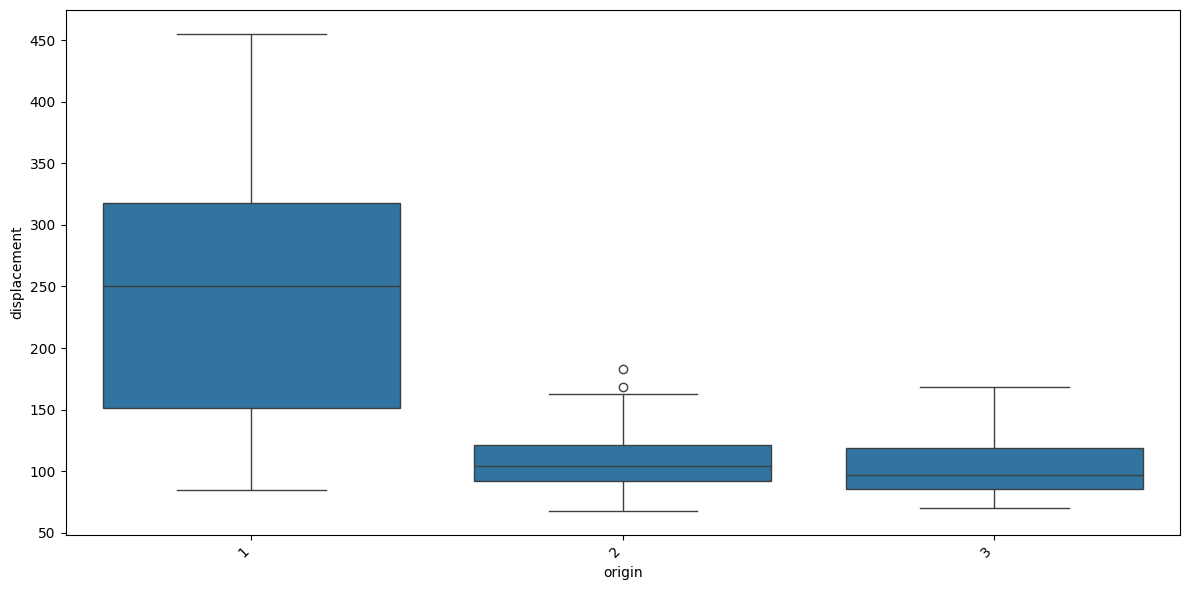

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=columns[1],
    y=columns[0],
    data=dataset[dataset[columns[1]].isin(dataset[columns[1]].unique())]
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Поскольку анализируемые выборки являются независимыми, их распределение не является нормальным, а количество сравниваемых групп превышает две, для проверки статистической значимости различий был применён непараметрический критерий Краскала-Уолиса

In [28]:
dataset.groupby(columns[1], observed=False)[columns[0]].apply(list)

,displacement
origin,
1,"[307.0, 350.0, 318.0, 304.0, 302.0, 429.0, 454..."
2,"[97.0, 110.0, 107.0, 104.0, 121.0, 116.0, 79.0..."
3,"[113.0, 97.0, 97.0, 113.0, 71.0, 72.0, 113.0, ..."


In [29]:
stats.kruskal(*dataset.groupby(columns[1], observed=False)[columns[0]].apply(list))

KruskalResult(statistic=np.float64(203.6011279462967), pvalue=np.float64(6.145777198480783e-45))

**Выводы по анализу взаимосвязи количественного и категориального признаков:**

*   **1. Статистическая значимость различий:**
    *   Присутствует статистически значимая взаимосвязь между количественным признаком `displacement` и категориальным признаком `origin`. Тест Краскала-Уоллиса показал статистически значимые различия (p-value = 6.146e-45, p < 0.05), что позволяет отвергнуть нулевую гипотезу об отсутствии различий между группами.

*   **2. Анализ описательных статистик:**
    *   **Средние значения:**
        *   Наибольшее среднее значение наблюдается в группе **1 (245.90)**, наименьшее — в группе **3 (102.71)**.
    *   **Медианные значения:**
        *   Наибольшая медиана наблюдается в группе **1 (250.0)**, наименьшая — в группе **3 (97.0)**.
    *   **Разброс данных:**
        *   Наибольший разброс характерен для группы **1 (std = 98.50)**, наименьший — для группы **2 (std = 22.58)**.
    *   **Экстремальные значения:**
        *   Максимальное значение признака зафиксировано в группе **1 (455.0)**, минимальное — в группе **2 (68.0)**.

*   **3. Анализ ящиков с усами:**
    *   **Разброс значений:**
        *   Наибольший разброс данных (самый длинный ящик и усы) наблюдается в группе **1**, что указывает на высокую вариабельность наблюдений. Наиболее компактное распределение характерно для групп **2 и 3**.
    *   **Выбросы:**
        *   Наличие выбросов наблюдается в группе **2**, что может свидетельствовать о наличии уникальных случаев или особенностей данных.
    *   **Сравнение распределений:**
        *   Распределения групп перекрываются **незначительно**, что **подтверждает** наличие статистически значимых различий между ними.

*   **4. Интерпретация результатов:**
    *   Результаты анализа подтверждают, что категориальный признак `origin` оказывает существенное влияние на количественный показатель `displacement`. Наиболее высокие значения характерны для группы **1**, тогда как группа **3** демонстрирует наименьшие значения как по средним, так и по медианным показателям. Различия в размахах распределения между группами указывают на неоднородность варьирования признака в разных категориях.

### 12.4 Признаки horsepower и origin

Нулевая гипотеза (H₀): распределения двух независимых выборок идентичны. Уровень значимости полагаем равным 0,05

Сохраним именна переменных в кортеж columns

In [30]:
columns = ('horsepower', 'origin')

Оценим медианные значения данного количественного признака в разрезе данного категориального

In [31]:
dataset.groupby(columns[1], observed=False)[columns[0]].median()

,horsepower
origin,
1,105.0
2,76.5
3,75.0


Оценим средние значения данного количественного признака в разрезе данного категориального

In [32]:
dataset.groupby(columns[1], observed=False)[columns[0]].mean()

,horsepower
origin,
1,118.903614
2,80.157143
3,79.835443


Оценим описательные статистики данного количественного признака в разрезе данного категориального

In [33]:
dataset.groupby(columns[1], observed=False)[columns[0]].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,249.0,118.903614,39.690318,52.0,88.00,105.0,150.0,230.0
2,70.0,80.157143,20.176494,46.0,69.25,76.5,90.0,133.0
3,79.0,79.835443,17.819199,52.0,67.00,75.0,95.0,132.0


Построим диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - данный категориальный признак, а в качестве y - данный количественный признак

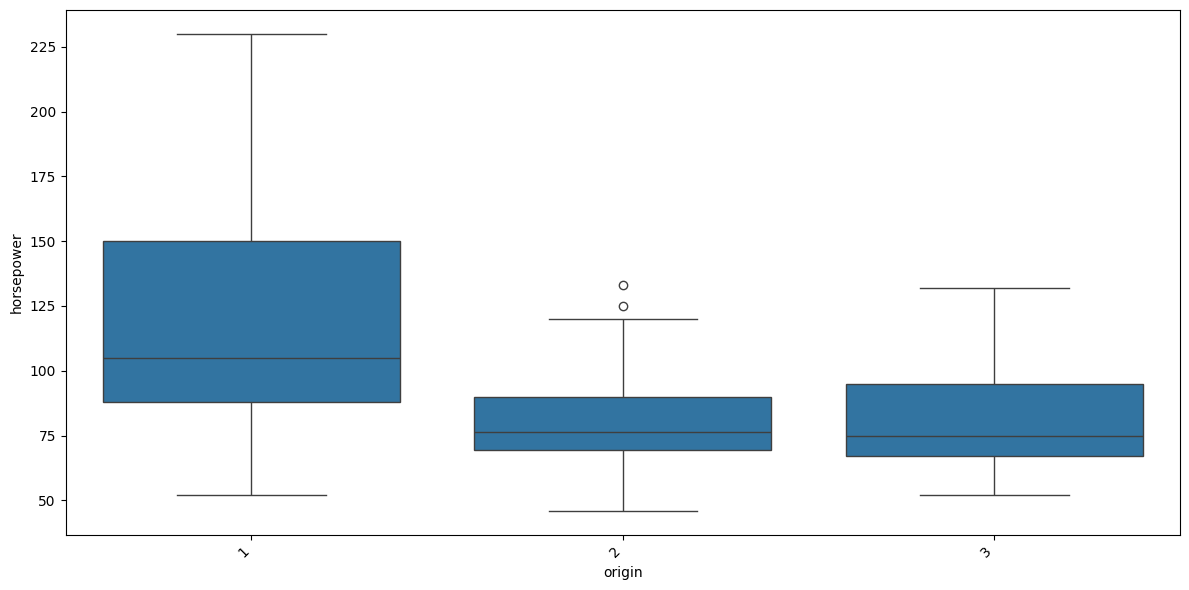

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=columns[1],
    y=columns[0],
    data=dataset[dataset[columns[1]].isin(dataset[columns[1]].unique())]
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Поскольку анализируемые выборки являются независимыми, их распределение не является нормальным, а количество сравниваемых групп превышает две, для проверки статистической значимости различий был применён непараметрический критерий Краскала-Уолиса

In [35]:
dataset.groupby(columns[1], observed=False)[columns[0]].apply(list)

,horsepower
origin,
1,"[130.0, 165.0, 150.0, 150.0, 140.0, 198.0, 220..."
2,"[46.0, 87.0, 90.0, 95.0, 113.0, 90.0, 70.0, 76..."
3,"[95.0, 88.0, 88.0, 95.0, 65.0, 69.0, 95.0, 97...."


In [36]:
stats.kruskal(*dataset.groupby(columns[1], observed=False)[columns[0]].apply(list))

KruskalResult(statistic=np.float64(108.521743073272), pvalue=np.float64(2.7214659714720412e-24))

**Выводы по анализу взаимосвязи количественного и категориального признаков:**

*   **1. Статистическая значимость различий:**
    *   Присутствует статистически значимая взаимосвязь между количественным признаком `horsepower` и категориальным признаком `origin`. Тест Краскала-Уоллиса показал статистически значимые различия (p-value = **2.72e-24**, p < 0.05), что позволяет отвергнуть нулевую гипотезу об отсутствии различий между группами.

*   **2. Анализ описательных статистик:**
    *   **Средние значения:**
        *   Наибольшее среднее значение наблюдается в группе **1 (118.90)**, наименьшее — в группе **3 (79.84)**.
    *   **Медианные значения:**
        *   Наибольшая медиана наблюдается в группе **1 (105.0)**, наименьшая — в группе **3 (75.0)**.
    *   **Разброс данных:**
        *   Наибольший разброс характерен для группы **1 (std = 39.69)**, наименьший — для группы **3 (std = 17.82)**.
    *   **Экстремальные значения:**
        *   Максимальное значение признака зафиксировано в группе **1 (230.0)**, минимальное — в группе **2 (46.0)**.

*   **3. Анализ ящиков с усами:**
    *   **Разброс значений:**
        *   Наибольший разброс данных (самый длинный ящик и усы) наблюдается в группе **1**, что указывает на высокую вариабельность наблюдений. Наиболее компактное распределение характерно для группы **2**.
    *   **Выбросы:**
        *   Наличие выбросов наблюдается в группе **2**, что может свидетельствовать о наличии уникальных случаев или особенностей данных.
    *   **Сравнение распределений:**
        *   Распределения групп перекрываются **незначительно**, что **подтверждает** наличие статистически значимых различий между ними.

*   **4. Интерпретация результатов:**
    *   Результаты анализа подтверждают, что категориальный признак (`origin`) оказывает существенное влияние на количественный показатель (`horsepower`). Наиболее высокие значения характерны для группы **1**, тогда как группа **3** демонстрирует наименьшие значения как по средним, так и по медианным показателям. Различия в размахах распределения между группами указывают на неоднородность варьирования признака в разных категориях.

### 12.5 Признаки weight и origin

Нулевая гипотеза (H₀): распределения двух независимых выборок идентичны. Уровень значимости полагаем равным 0,05

Сохраним именна переменных в кортеж columns

In [37]:
columns = ('weight', 'origin')

Оценим медианные значения данного количественного признака в разрезе данного категориального

In [38]:
dataset.groupby(columns[1], observed=False)[columns[0]].median()

,weight
origin,
1,3365.0
2,2240.0
3,2155.0


Оценим средние значения данного количественного признака в разрезе данного категориального

In [39]:
dataset.groupby(columns[1], observed=False)[columns[0]].mean()

,weight
origin,
1,3361.931727
2,2423.300000
3,2221.227848


Оценим описательные статистики данного количественного признака в разрезе данного категориального

In [40]:
dataset.groupby(columns[1], observed=False)[columns[0]].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,249.0,3361.931727,794.792506,1800.0,2720.00,3365.0,4054.00,5140.0
2,70.0,2423.300000,490.043191,1825.0,2067.25,2240.0,2769.75,3820.0
3,79.0,2221.227848,320.497248,1613.0,1985.00,2155.0,2412.50,2930.0


Построим диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - данный категориальный признак, а в качестве y - данный количественный признак

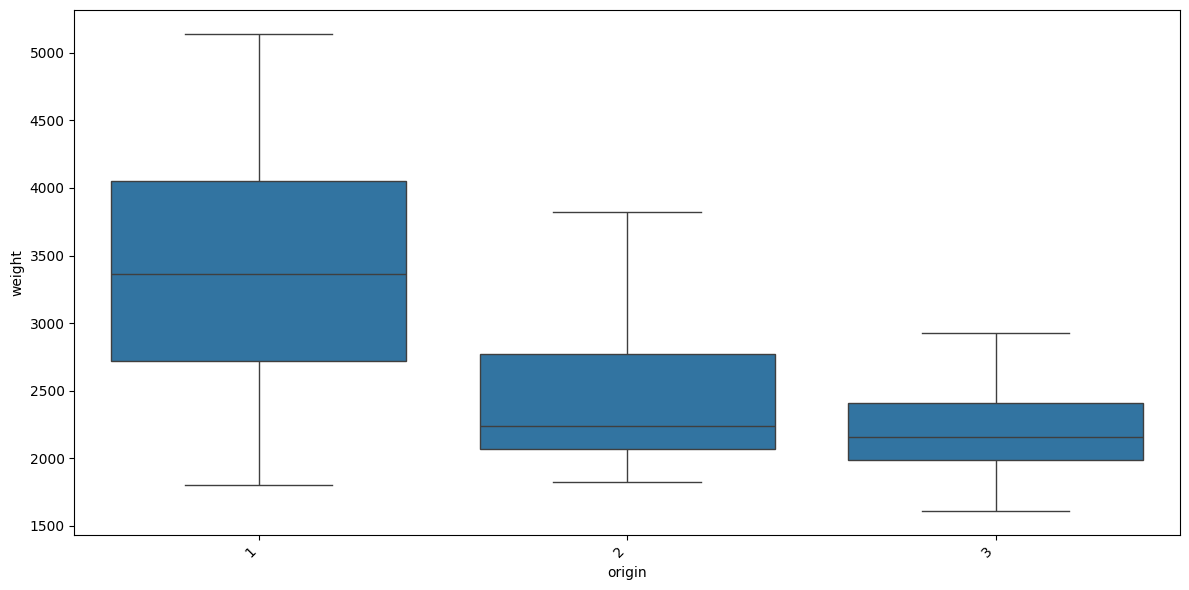

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=columns[1],
    y=columns[0],
    data=dataset[dataset[columns[1]].isin(dataset[columns[1]].unique())]
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Поскольку анализируемые выборки являются независимыми, их распределение не является нормальным, а количество сравниваемых групп превышает две, для проверки статистической значимости различий был применён непараметрический критерий Краскала-Уолиса

In [42]:
dataset.groupby(columns[1], observed=False)[columns[0]].apply(list)

,weight
origin,
1,"[3504, 3693, 3436, 3433, 3449, 4341, 4354, 431..."
2,"[1835, 2672, 2430, 2375, 2234, 2123, 2074, 206..."
3,"[2372, 2130, 2130, 2228, 1773, 1613, 2278, 233..."


In [43]:
stats.kruskal(*dataset.groupby(columns[1], observed=False)[columns[0]].apply(list))

KruskalResult(statistic=np.float64(158.1879032137409), pvalue=np.float64(4.4661495889563906e-35))

**Выводы по анализу взаимосвязи количественного и категориального признаков:**

*   **1. Статистическая значимость различий:**
    *   Присутствует статистически значимая взаимосвязь между количественным признаком `weight` и категориальным признаком `origin`. Тест Краскала-Уоллиса показал статистически значимые различия (p-value = **4.47e-35**, p < 0.05), что позволяет отвергнуть нулевую гипотезу об отсутствии различий между группами.

*   **2. Анализ описательных статистик:**
    *   **Средние значения:**
        *   Наибольшее среднее значение наблюдается в группе **1 (3361.93)**, наименьшее — в группе **3 (2221.23)**.
    *   **Медианные значения:**
        *   Наибольшая медиана наблюдается в группе **1 (3365.0)**, наименьшая — в группе **3 (2155.0)**.
    *   **Разброс данных:**
        *   Наибольший разброс характерен для группы **1 (std = 794.79)**, наименьший — для группы **3 (std = 320.50)**.
    *   **Экстремальные значения:**
        *   Максимальное значение признака зафиксировано в группе **1 (5140.0)**, минимальное — в группе **3 (1613.0)**.

*   **3. Анализ ящиков с усами:**
    *   **Разброс значений:**
        *   Наибольший разброс данных (самый длинный ящик и усы) наблюдается в группе **1**, что указывает на высокую вариабельность наблюдений. Наиболее компактное распределение характерно для группы **3**.
    *   **Выбросы:**
        *  Выбросы отсутствуют, что может свидетельствовать об отсутствии уникальных случаев или особенностей данных.

    *   **Сравнение распределений:**
        *   Распределения групп перекрываются **незначительно**, что **подтверждает** наличие статистически значимых различий между ними.

*   **4. Интерпретация результатов:**
    *   Результаты анализа подтверждают, что категориальный признак (`origin`) оказывает существенное влияние на количественный показатель (`weight`). Наиболее высокие значения характерны для группы **1**, тогда как группа **3** демонстрирует наименьшие значения как по средним, так и по медианным показателям. Различия в размахах распределения между группами указывают на неоднородность варьирования признака в разных категориях.


### 12.6 Признаки acceleration и origin

Нулевая гипотеза (H₀): распределения двух независимых выборок идентичны. Уровень значимости полагаем равным 0,05

Сохраним именна переменных в кортеж columns

In [44]:
columns = ('acceleration', 'origin')

Оценим медианные значения данного количественного признака в разрезе данного категориального

In [45]:
dataset.groupby(columns[1], observed=False)[columns[0]].median()

,acceleration
origin,
1,15.0
2,15.7
3,16.4


Оценим средние значения данного количественного признака в разрезе данного категориального

In [46]:
dataset.groupby(columns[1], observed=False)[columns[0]].mean()

,acceleration
origin,
1,15.033735
2,16.787143
3,16.172152


Оценим описательные статистики данного количественного признака в разрезе данного категориального

In [47]:
dataset.groupby(columns[1], observed=False)[columns[0]].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,249.0,15.033735,2.751112,8.0,13.0,15.0,16.90,22.2
2,70.0,16.787143,3.045687,12.2,14.5,15.7,18.90,24.8
3,79.0,16.172152,1.954937,11.4,14.6,16.4,17.55,21.0


Построим диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - данный категориальный признак, а в качестве y - данный количественный признак

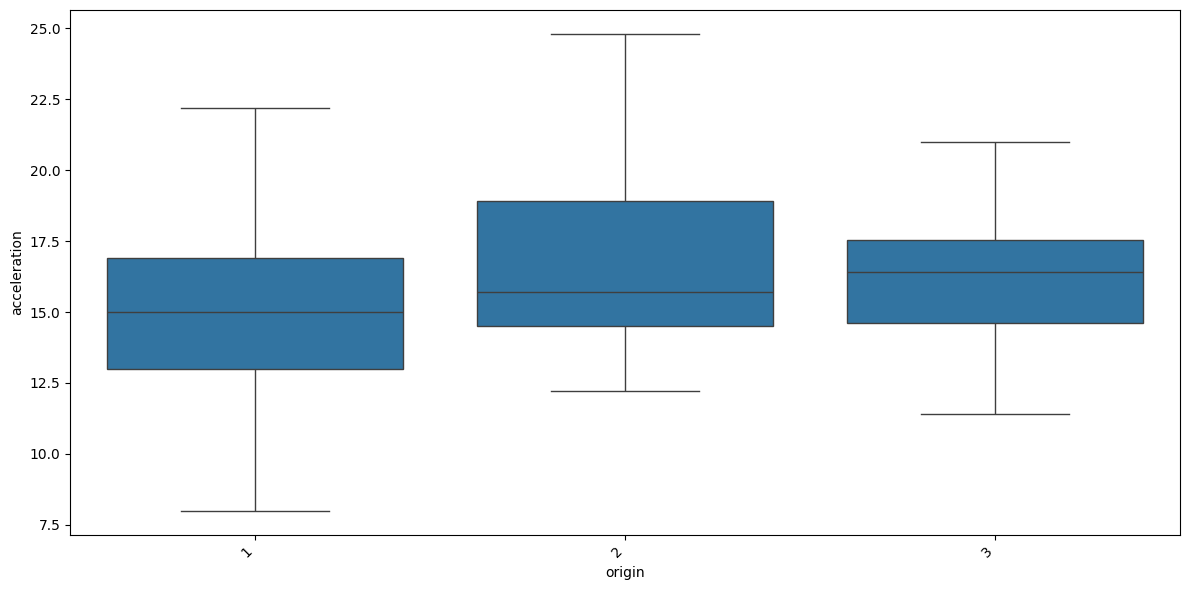

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=columns[1],
    y=columns[0],
    data=dataset[dataset[columns[1]].isin(dataset[columns[1]].unique())]
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Поскольку анализируемые выборки являются независимыми, их распределение не является нормальным, а количество сравниваемых групп превышает две, для проверки статистической значимости различий был применён непараметрический критерий Краскала-Уолиса

In [49]:
dataset.groupby(columns[1], observed=False)[columns[0]].apply(list)

,acceleration
origin,
1,"[12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5,..."
2,"[20.5, 17.5, 14.5, 17.5, 12.5, 14.0, 19.5, 14...."
3,"[15.0, 14.5, 14.5, 14.0, 19.0, 18.0, 15.5, 13...."


In [50]:
stats.kruskal(*dataset.groupby(columns[1], observed=False)[columns[0]].apply(list))

KruskalResult(statistic=np.float64(21.092800117272393), pvalue=np.float64(2.628794579507175e-05))

**Выводы по анализу взаимосвязи количественного и категориального признаков:**

*   **1. Статистическая значимость различий:**
    *   Присутствует статистически значимая взаимосвязь между количественным признаком `acceleration` и категориальным признаком `origin`. Тест Краскала-Уоллиса показал статистически значимые различия (p-value = **2.63e-0.5**, p < 0.05), что позволяет отвергнуть нулевую гипотезу об отсутствии различий между группами.

*   **2. Анализ описательных статистик:**
    *   **Средние значения:**
        *   Наибольшее среднее значение наблюдается в группе **2 (16.79)**, наименьшее — в группе **1 (15.03)**.
    *   **Медианные значения:**
        *   Наибольшая медиана наблюдается в группе **3 (16.4)**, наименьшая — в группе **1 (15.0)**.
    *   **Разброс данных:**
        *   Наибольший разброс характерен для группы **2 (std = 3.05)**, наименьший — для группы **3 (std = 1.95)**.
    *   **Экстремальные значения:**
        *   Максимальное значение признака зафиксировано в группе **2 (24.8)**, минимальное — в группе **1 (8.0)**.

*   **3. Анализ ящиков с усами:**
    *   **Разброс значений:**
        *   Наибольший разброс данных (самый длинный ящик и усы) наблюдается в группе **1**, что указывает на высокую вариабельность наблюдений. Наиболее компактное распределение характерно для группы **3**.
    *   **Выбросы:**
        *  Выбросы отсутствуют, что может свидетельствовать о отсутствии уникальных случаев или особенностей данных.
    *   **Сравнение распределений:**
        *   Распределения групп перекрываются **значительно**, что **не подтверждает** наличие статистически значимых различий между ними (несмотря на значимый p-value, визуально распределения сильно перекрываются).

*   **4. Интерпретация результатов:**
    *   Результаты анализа показывают, что категориальный признак (`origin`) оказывает влияние на количественный показатель (`acceleration`). Наиболее высокие значения в среднем характерны для группы **2**, тогда как группа **1** демонстрирует наименьшие значения как по средним, так и по медианным показателям. Однако значительное перекрытие распределений между группами указывает на то, что различия, хотя и статистически значимы, могут быть не столь выраженными на практике по сравнению с предыдущими парами признаков.

### 12.7 Признаки model year и origin

Нулевая гипотеза (H₀): распределения двух независимых выборок идентичны. Уровень значимости полагаем равным 0,05

Сохраним именна переменных в кортеж columns

In [51]:
columns = ('model year', 'origin')

Оценим медианные значения данного количественного признака в разрезе данного категориального

In [52]:
dataset.groupby(columns[1], observed=False)[columns[0]].median()

,model year
origin,
1,76.0
2,76.0
3,78.0


Оценим средние значения данного количественного признака в разрезе данного категориального

In [53]:
dataset.groupby(columns[1], observed=False)[columns[0]].mean()

,model year
origin,
1,75.610442
2,75.814286
3,77.443038


Оценим описательные статистики данного количественного признака в разрезе данного категориального

In [54]:
dataset.groupby(columns[1], observed=False)[columns[0]].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
1,249.0,75.610442,3.677094,70.0,73.0,76.0,79.0,82.0
2,70.0,75.814286,3.469506,70.0,73.0,76.0,79.0,82.0
3,79.0,77.443038,3.650595,70.0,74.0,78.0,81.0,82.0


Построим диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - данный категориальный признак, а в качестве y - данный количественный признак

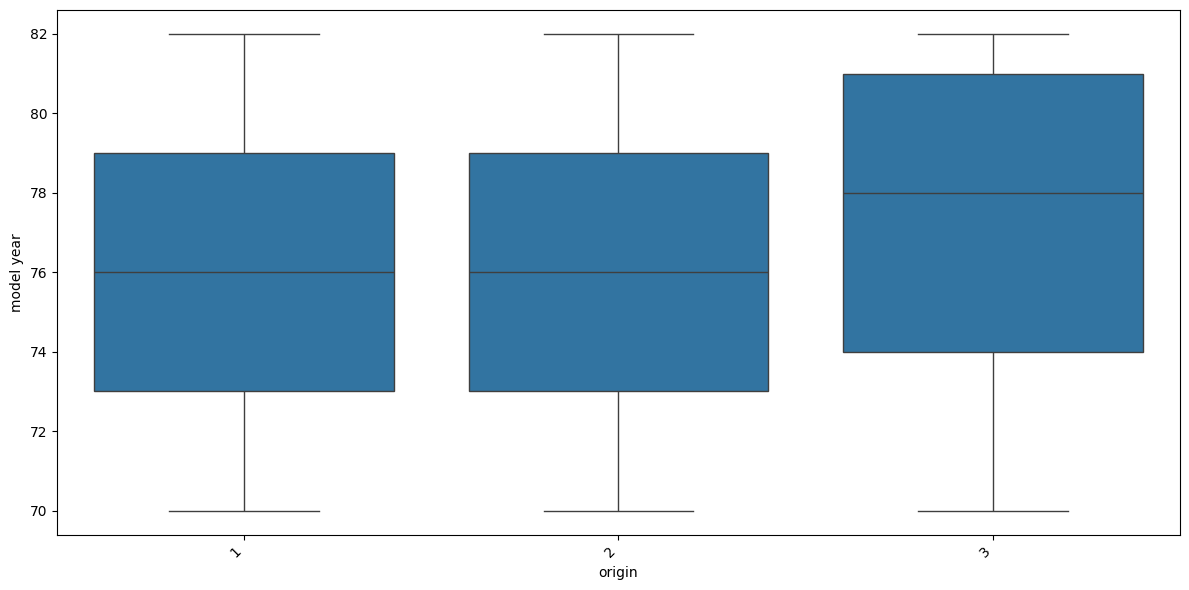

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x=columns[1],
    y=columns[0],
    data=dataset[dataset[columns[1]].isin(dataset[columns[1]].unique())]
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Поскольку анализируемые выборки являются независимыми, их распределение не является нормальным, а количество сравниваемых групп превышает две, для проверки статистической значимости различий был применён непараметрический критерий Краскала-Уолиса

In [56]:
dataset.groupby(columns[1], observed=False)[columns[0]].apply(list)

,model year
origin,
1,"[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7..."
2,"[70, 70, 70, 70, 70, 71, 71, 71, 71, 72, 72, 7..."
3,"[70, 70, 71, 71, 71, 71, 72, 72, 72, 72, 72, 7..."


In [57]:
stats.kruskal(*dataset.groupby(columns[1], observed=False)[columns[0]].apply(list))

KruskalResult(statistic=np.float64(14.824293461789058), pvalue=np.float64(0.0006038729493618429))

**Выводы по анализу взаимосвязи количественного признака и категориального признака:**

*   **1. Статистическая значимость различий:**
    *   Присутствует статистически значимая взаимосвязь между количественным признаком `model year` и категориальным признаком `origin`. Тест Краскела-Уоллиса показал статистически значимые различия (p-value = **0.0006**, p < 0.05), что позволяет отвергнуть нулевую гипотезу об отсутствии различий между группами.

*   **2. Анализ описательных статистик:**
    *   **Средние значения:**
        *   Наибольшее среднее значение наблюдается в группе **3 (77.44)**, наименьшее — в группе **1 (75.61)**.
    *   **Медианные значения:**
        *   Наибольшая медиана наблюдается в группе **3 (78.0)**, наименьшая — в группе **1 и 2 (76.0)**.
    *   **Разброс данных:**
        *   Наибольший разброс характерен для группы **1 (std = 3.68)**, наименьший — для группы **2 (std = 3.47)**.
    *   **Экстремальные значения:**
        *   Максимальное значение признака зафиксировано **во всех группах (82.0)**, минимальное — **во всех группах (70.0)**.

*   **3. Анализ ящиков с усами:**
    *   **Разброс значений:**
        *   Наибольший разброс данных (самый длинный ящик и усы) наблюдается в группе **3**, что указывает на высокую вариабельность наблюдений. Наиболее компактное распределение характерно для групп **1 и 2**.
    *   **Выбросы:**
        * Выбросы отсутствуют, что может свидетельствовать об отсутствии уникальных случаев или особенностей данных.
    *   **Сравнение распределений:**
        *   Распределения групп перекрываются **значительно**, что **не подтверждает** наличие статистически значимых различий между ними на визуальном уровне, однако статистический тест показывает обратное.

*   **4. Интерпретация результатов:**
    *   Результаты анализа подтверждают, что категориальный признак `origin` оказывает существенное влияние на количественный показатель `model year`. Наиболее высокие значения характерны для группы **3**, тогда как группы **1 и 2** демонстрируют схожие и наименьшие значения как по средним, так и по медианным показателям. Различия в размахах распределения между группами указывают на неоднородность варьирования признака в разных категориях.